#### 1.Voltage smoothing

In [126]:
using CSV
raw = CSV.read("voltages.csv", datarow = 1)
(a,b) = size(raw)
v = raw[1:a,1]

200-element Array{Union{Missing, Float64},1}:
  0.0
  0.0
  0.0
  0.0
  0.0
  0.0
  0.0
  0.0
  0.0
  0.0
  1.0
  1.0
  1.0
  ⋮  
 -1.0
 -1.0
  0.0
  0.0
  0.0
  0.0
  0.0
  0.0
  0.0
  0.0
  0.0
  0.0

In [127]:
# param = 0
using JuMP, Gurobi

m = Model(solver=GurobiSolver(OutputFlag=0,BarHomogeneous=1))

@variable(m, u[1:200])
@objective(m, Min, 1/1000 * sum((v-u).^2))

solve(m)
println(getobjectivevalue(m))
y1 = getvalue(u)
;

Academic license - for non-commercial use only
-2.7755575615628914e-16


In [128]:
# param = 0.5
using JuMP, Gurobi

m = Model(solver=GurobiSolver(OutputFlag=0,BarHomogeneous=1))

@variable(m, u[1:200])
@objective(m, Min, 1/1000 * sum((v-u).^2)+ 0.5* sum((u[i]-u[i-1]).^2 for i=2:200))

solve(m)
println(getobjectivevalue(m))
y2 = getvalue(u)
;

Academic license - for non-commercial use only
0.2121739686297956


In [129]:
# param = 1
using JuMP, Gurobi

m = Model(solver=GurobiSolver(OutputFlag=0,BarHomogeneous=1))

@variable(m, u[1:200])
@objective(m, Min, 1/1000 * sum((v-u).^2)+ sum((u[i]-u[i-1]).^2 for i=2:200))

solve(m)
println(getobjectivevalue(m))
y3 = getvalue(u)
;

Academic license - for non-commercial use only
0.23837533749462436


In [130]:
# param = 2
using JuMP, Gurobi

m = Model(solver=GurobiSolver(OutputFlag=0,BarHomogeneous=1))

@variable(m, u[1:200])
@objective(m, Min, 1/1000 * sum((v-u).^2)+ 2* sum((u[i]-u[i-1]).^2 for i=2:200\))

solve(m)
println(getobjectivevalue(m))
y4 = getvalue(u)
;

Academic license - for non-commercial use only
0.26149114640136295


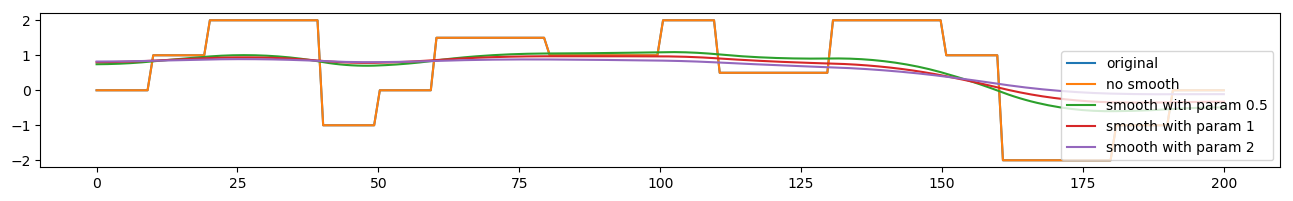

In [131]:
using PyPlot
figure(figsize=(16,2))
x = range(0,stop=200,length=200)
plot(x,v)
plot(x,y1)
plot(x,y2)
plot(x,y3)
plot(x,y4)
legend(["original", "no smooth","smooth with param 0.5",
        "smooth with param 1","smooth with param 2"], loc="lower right");

#### 2.Quadratic form positivity

##### a)
v =\begin{bmatrix}
x\\
y\\
z\\
    \end{bmatrix}
Q =\begin{bmatrix}
2&2&-3\\
2&2&-3\\
-3&-3&9\\
\end{bmatrix}

In [132]:
#b)
using LinearAlgebra
Q = 
[2 4 -3;
4 2 -3;
-3 -3 9]
eigvals(Q)

3-element Array{Float64,1}:
 -1.9999999999999996
  2.9999999999999982
 12.0               

b) From lecture, the set $x^TQx \le b$ is an ellipoid only when all eigenvalues of Q satisfy $\lambda_i \ge 0$.<br>
In this case, $\lambda_1 < 0$, therefore, the set of (x,y,z) satisfying the constraint (1) is not an ellipsoid.

In [133]:
#c
U = eigvecs(Q)
d1 = Diagonal([0,eigvals(Q)[2].^(1/2),eigvals(Q)[3].^(1/2)])
d2 = Diagonal([(-eigvals(Q)[1]).^(1/2),0,0])


3×3 Diagonal{Float64,Array{Float64,1}}:
 1.41421   ⋅    ⋅ 
  ⋅       0.0   ⋅ 
  ⋅        ⋅   0.0

v =\begin{bmatrix}
x\\
y\\
z\\
    \end{bmatrix}
    
Matrix A is

In [134]:
hQ1 = U*d1*U'

3×3 Array{Float64,2}:
  1.1547    1.1547   -0.57735
  1.1547    1.1547   -0.57735
 -0.57735  -0.57735   2.88675

Matrix B is 

In [135]:
hQ2 = U*d2*U'

3×3 Array{Float64,2}:
  0.707107  -0.707107  0.0
 -0.707107   0.707107  0.0
  0.0        0.0       0.0

d) As long as y = -x and z = x/3, the constraint can be satisfied, by completing the square.

#### 3. Lasso regression

In [136]:
using CSV
raw = CSV.read("lasso_data.csv", datarow = 1)
(a,b) = size(raw)
x = raw[1:a,1]
y = raw[1:a,2]
# order of polynomial to use
k = 6
A = zeros(a,k)
for i = 1:a
    for j = 1:k
        A[i,j] = x[i]^(k-j)
    end
end

In [137]:
using JuMP, Gurobi

m = Model(solver=GurobiSolver(OutputFlag=0,BarHomogeneous = 1))

@variable(m, u[1:k])
@objective(m, Min, sum( (y - A*u).^2 ))

status = solve(m)
uopt = getvalue(u)
println(status)
println(getobjectivevalue(m))
println(uopt)

Academic license - for non-commercial use only
Optimal
1.01444877238621
[-320.872, 619.059, -333.419, 41.1237, 2.18777, 0.584456]


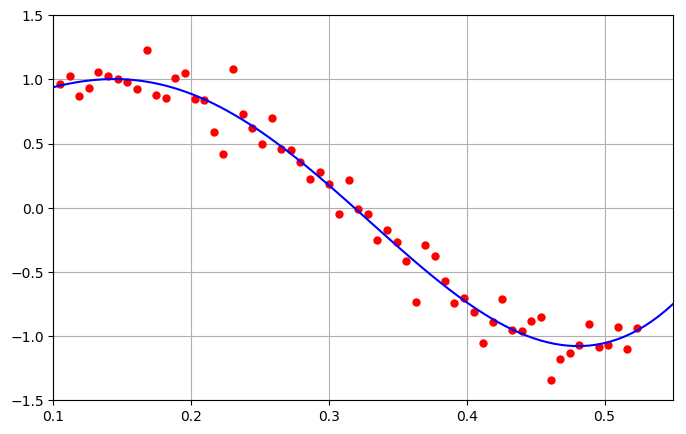

In [138]:
using PyPlot
npts = 100
xfine = range(0.1,stop = 0.6,length  = 100)
ffine = ones(npts)
for j = 1:k-1
    ffine = [ffine.*xfine ones(npts)]
end
yfine = ffine * uopt
figure(figsize=(8,5))
plot( x, y, "r.", markersize=10)
plot( xfine, yfine, "b-")
axis([0.1,0.55,-1.5,1.5])
grid()


In [139]:
using CSV
raw = CSV.read("lasso_data.csv", datarow = 1)
(a,b) = size(raw)
x = raw[1:a,1]
y = raw[1:a,2]
# order of polynomial to use
k = 16
A = zeros(a,k)
for i = 1:a
    for j = 1:k
        A[i,j] = x[i]^(k-j)
    end
end

In [140]:
using JuMP, Gurobi

m = Model(solver=MosekSolver(LOG = 0))

@variable(m, u[1:k])
@objective(m, Min, sum( (y - A*u).^2 ))

status = solve(m)
uopt = getvalue(u)
println(status)
println(getobjectivevalue(m))
println(uopt)

Optimal
1.0114146468113319
[-2.88446e6, -1.46772e6, 2.60499e6, 3.92244e6, -3.93226e6, 0.0, 6.06798e5, 0.0, 0.0, -47271.7, 0.0, 14368.0, -5924.52, 1009.81, -77.0079, 3.07714]


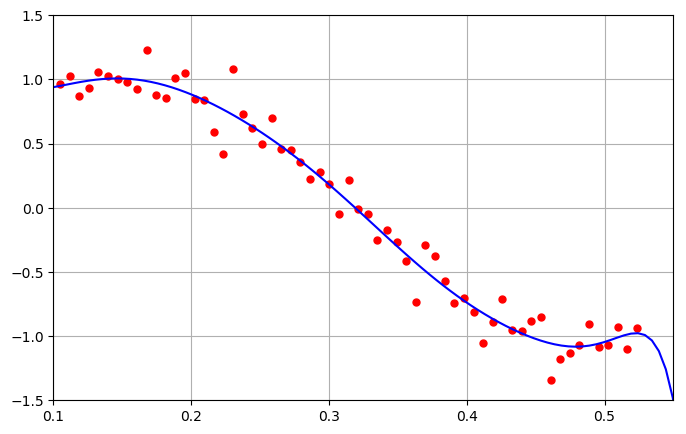

In [141]:
using PyPlot
npts = 100
xfine = range(0.1,stop = 0.6,length  = 100)
ffine = ones(npts)
for j = 1:k-1
    ffine = [ffine.*xfine ones(npts)]
end
yfine = ffine * uopt
figure(figsize=(8,5))
plot( x, y, "r.", markersize=10)
plot( xfine, yfine, "b-")
axis([0.1,0.55,-1.5,1.5])
grid()

In [142]:
#b
k = 16
λ= 1e-6
A = zeros(a,k)
for i = 1:n
    for j = 1:k
        A[i,j] = x[i]^(k-j)
    end
end


In [143]:
using JuMP, Gurobi, Mosek

m = Model(solver=MosekSolver(LOG=0))
@variable(m, u[1:k])
@objective(m, Min, sum( (y - A*u).^2 ) + λ*sum(u.^2))
status = solve(m)
uopt = getvalue(u)
println(status)
println(uopt)

Optimal
[-0.594575, -0.97555, -1.54971, -2.35425, -3.3504, -4.29447, -4.50957, -2.5878, 3.71181, 16.5014, 33.919, 42.0642, 11.6286, -55.0324, 14.6022, -0.00544862]


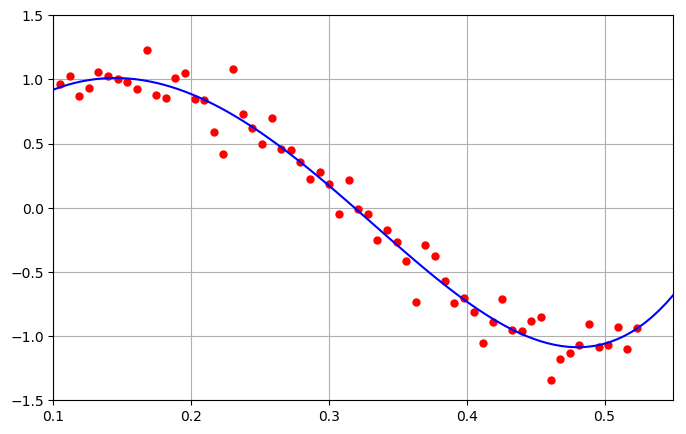

In [144]:
using PyPlot
npts = 100
xfine = range(0.1,stop = 0.6,length  = 100)
ffine = ones(npts)
for j = 1:k-1
    ffine = [ffine.*xfine ones(npts)]
end
yfine = ffine * uopt
figure(figsize=(8,5))
plot( x, y, "r.", markersize=10)
plot( xfine, yfine, "b-")
axis([0.1,0.55,-1.5,1.5])
grid()

In [145]:
#c
k = 16
λ= 1e-2
A = zeros(a,k)
for i = 1:n
    for j = 1:k
        A[i,j] = x[i]^(k-j)
    end
end

In [146]:
using JuMP, Gurobi, Mosek

m = Model(solver=MosekSolver(LOG=0))

@variable(m, u[1:k])

# 1-norm
@variable(m, t[1:k])
@constraint(m, u .<= t )
@constraint(m, -t .<= u )

@objective(m, Min, sum( (y - A*u).^2 ) + λ*sum(t) )

status = solve(m)
uopt = getvalue(u)
println(status)
println(uopt)

Optimal
[3.90955e-8, 7.37074e-8, 1.38273e-7, 2.57305e-7, 4.74073e-7, 8.64111e-7, 1.56417e-6, 2.8656e-6, 5.66205e-6, 1.50471e-5, 53.8514, 0.00158243, 2.15902e-6, -20.8382, 2.6227, 1.09266]


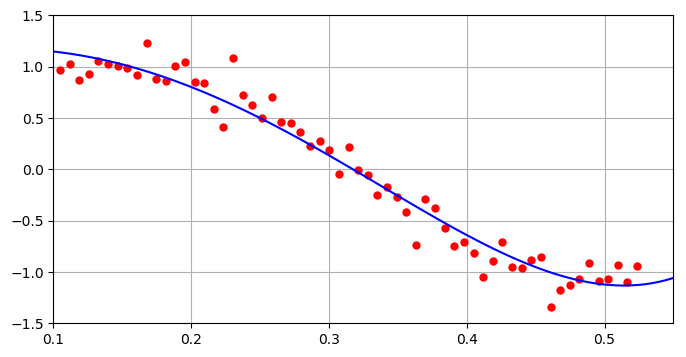

In [147]:
using PyPlot
npts = 100
xfine = range(0.1,stop = 0.6,length  = 100)
ffine = ones(npts)
for j = 1:k-1
    ffine = [ffine.*xfine ones(npts)]
end
yfine = ffine * uopt
figure(figsize=(8,4))
plot( x, y, "r.", markersize=10)
plot( xfine, yfine, "b-")
axis([0.1,0.55,-1.5,1.5])
grid()
